# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [2]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [3]:
# Run this code:
salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [4]:
# Your code here:
salaries.head(2)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [5]:
# Your code here:
salaries.isna().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
# Your code here:
salaries[['Salary or Hourly']].value_counts()

Salary or Hourly
Salary              25161
Hourly               8022
dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
# Your code here:
# salaries.groupby('Department').agg({'Name': np.count_nonzero})
# salaries.groupby('Department').agg('count')['Name'][:5]
salaries[['Department']].value_counts()[:5]

Department   
POLICE           13414
FIRE              4641
STREETS & SAN     2198
OEMC              2102
WATER MGMNT       1879
dtype: int64

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [8]:
# Your code here:
from scipy.stats import ttest_1samp
# selecting the hourly columns and then chosing the Hourly rate columns without NA
hourly = salaries[salaries['Salary or Hourly']=='Hourly']['Hourly Rate'].dropna()
# Calculating the mean value to understand how far away are we from $30/hr
round(hourly.mean(),2)

32.79

In [9]:
hourly = salaries['Hourly Rate'].dropna()

In [10]:
from statsmodels.stats.weightstats import ztest as ztest
# Perform the hypothesis test for 1 sample.
p_value = ztest(hourly, value=30)[1]
p_value

1.8228873859286195e-94

In [11]:
# hypothesis test for a 95% two sided confidence interval.
p_value <=0.05

True

Indeed, the p-value is lower than our threshold of 0.05, so we reject the null hypothesis in favor of the default “two-sided” alternative: the mean of salary per hour is significantly different than $30/hour.

Text(0.5, 1.0, 'Distribution of Hourly Rate')

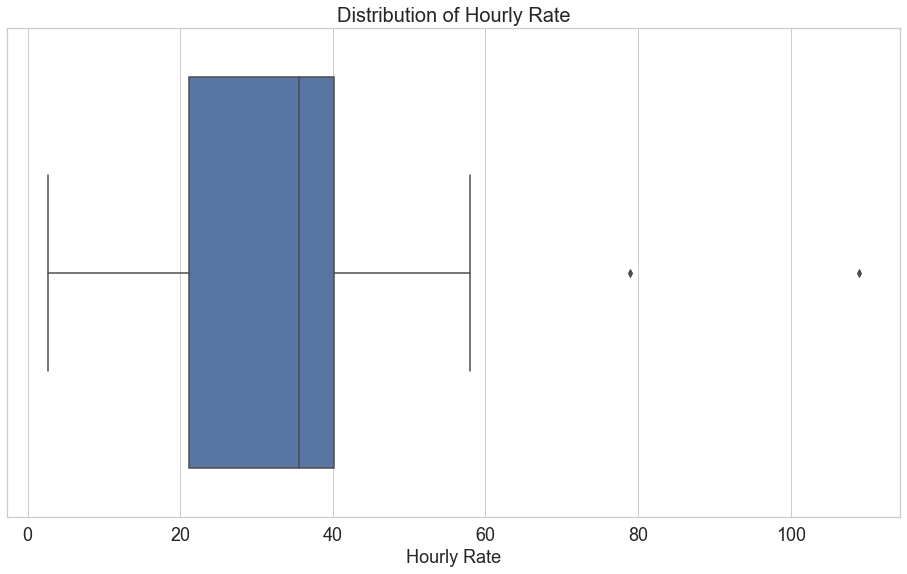

In [12]:
sns.boxplot(x=hourly)
plt.title("Distribution of Hourly Rate")

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [13]:
# Your code here:
# selecting the salary columns and then chosing the Annual Salary values without NA
police = salaries[salaries.Department=='POLICE']
salary = police[police['Salary or Hourly']=='Salary']['Annual Salary'].dropna()
# Calculating the mean value to understand how far away are we from over $86000/year 
round(salary.mean(),2)

86486.41

In [14]:
# Perform the hypothesis test for 1 sample, where the alternative is greater.
p_value = ztest(salary, value=86000, alternative='smaller')[1]/2
round(p_value, 3)

0.499

In [15]:
# hypothesis test for a 95% one sided confidence interval.
p_value <=0.05

False

Indeed, the p-value is much higher than our threshold of 0.05, so we accept the null hypothesis: the mean of annual salary in the Police is significantly larger than $86000/year.

Text(0.5, 1.0, 'Distribution of Annual Salaries')

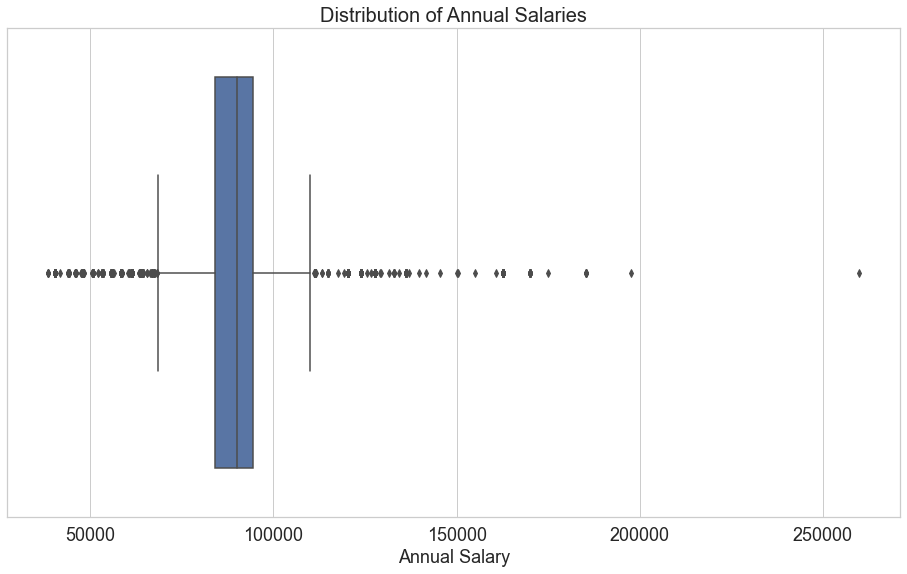

In [16]:
sns.boxplot(x=salary)
plt.title("Distribution of Annual Salaries")

Using the `crosstab` function, find the department that has the most hourly workers. 

In [17]:
# Your code here:
hours_max = pd.crosstab(salaries.Department, salaries[salaries['Salary or Hourly']=='Hourly']['Salary or Hourly']).sort_values('Hourly', ascending=False)
hours_max.columns = ['Hourly_workers']
hours_max.head(1)

,Hourly_workers
Department,
STREETS & SAN,1862


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [18]:
# Your code here:
# selecting the department, only Hourly employees and then chosing the Hourly Rate values without NA
streets = salaries[salaries.Department=='STREETS & SAN']
worst = streets[streets['Salary or Hourly']=='Hourly']['Hourly Rate'].dropna()
# Calculating the mean value to understand how far away are we from less than $35/hour 
round(worst.mean(),2)

33.73

In [19]:
# Perform the hypothesis test for 1 sample, where the alternative is less.
p_value = ztest(worst, value=35, alternative='larger')[1]/2
round(p_value,3)

0.5

In [20]:
# hypothesis test for a 95% one sided confidence interval.
p_value <=0.05

False

Indeed, the p-value is larger than our threshold of 0.05, so we accept the null hypothesis: the hourly wage for the hourly workers at STREETS & SAN is less than $35/hour.

Text(0.5, 1.0, 'Distribution of Hourly Rate in STREETS & SAN')

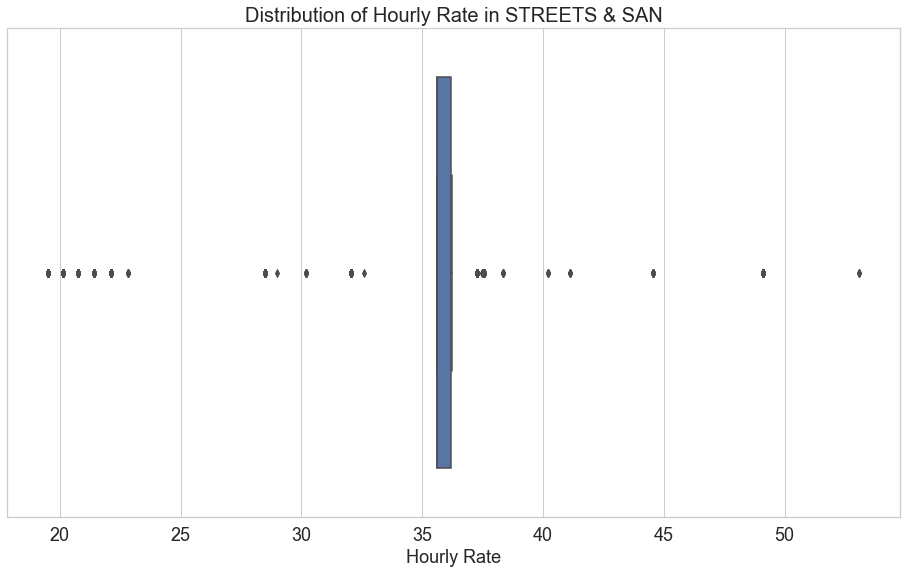

In [21]:
sns.boxplot(x=worst)
plt.title("Distribution of Hourly Rate in STREETS & SAN")

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [22]:
# Your code here:
from scipy.stats import t, sem
hourly = salaries['Hourly Rate'].dropna()
hourly

4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

In [23]:
t.interval(0.95, len(hourly)-1, loc=hourly.mean(), scale=sem(hourly))

(32.52345834488529, 33.05365708767727)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [24]:
# Your code here:
police = salaries[salaries.Department=='POLICE']
hourly_police = police['Annual Salary'].dropna()
t.interval(0.95, len(hourly_police)-1, loc=hourly_police.mean(), scale=sem(hourly_police))

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [25]:
# Your code here:
from statsmodels.stats.proportion import proportions_ztest
prop = proportions_ztest(count=salaries[salaries['Salary or Hourly']=='Hourly']['Salary or Hourly'].shape[0], nobs=len(salaries), value=0.25)[1]
prop
# counts is the length of sample
# nobs is all the population
# value is the value of our hypothesis

0.0004481127249057967

In [26]:
prop<=0.05

True

Indeed, the p-value is lower than our threshold of 0.05, so we reject the null hypothesis in favor of the alternative: the number of hourly workers in the City of Chicago is NOT significantly different from 25% at the 95% confidence level.